In [1]:
import requests
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
def fetch_data(url):
    response = requests.get(url).json()
    return response

In [3]:
def preprocess_data(data):
    df = pd.DataFrame(data["historical"])
    df.reset_index(inplace=True)
    df.rename(columns={'date': 'ds', 'adjClose': 'y'}, inplace=True)
    return df

In [4]:
def train_prophet_model(data):
    model = Prophet(
        changepoint_prior_scale=0.05,
        holidays_prior_scale=10,
        seasonality_prior_scale=10,
        weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False
    )
    model.add_country_holidays(country_name='US')
    model.fit(data)
    return model

In [5]:
def generate_forecast(model, periods=365):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

In [6]:
def plot_forecast(model, forecast):

    fig = model.plot(forecast,
                     figsize=(13, 8),
                    )

    plt.xticks(rotation=90)
    plt.xlabel("\ntime", fontsize=14)
    plt.ylabel("target\n", fontsize=14)
    plt.title("Stoke price prediction using Prophet", fontsize=18)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


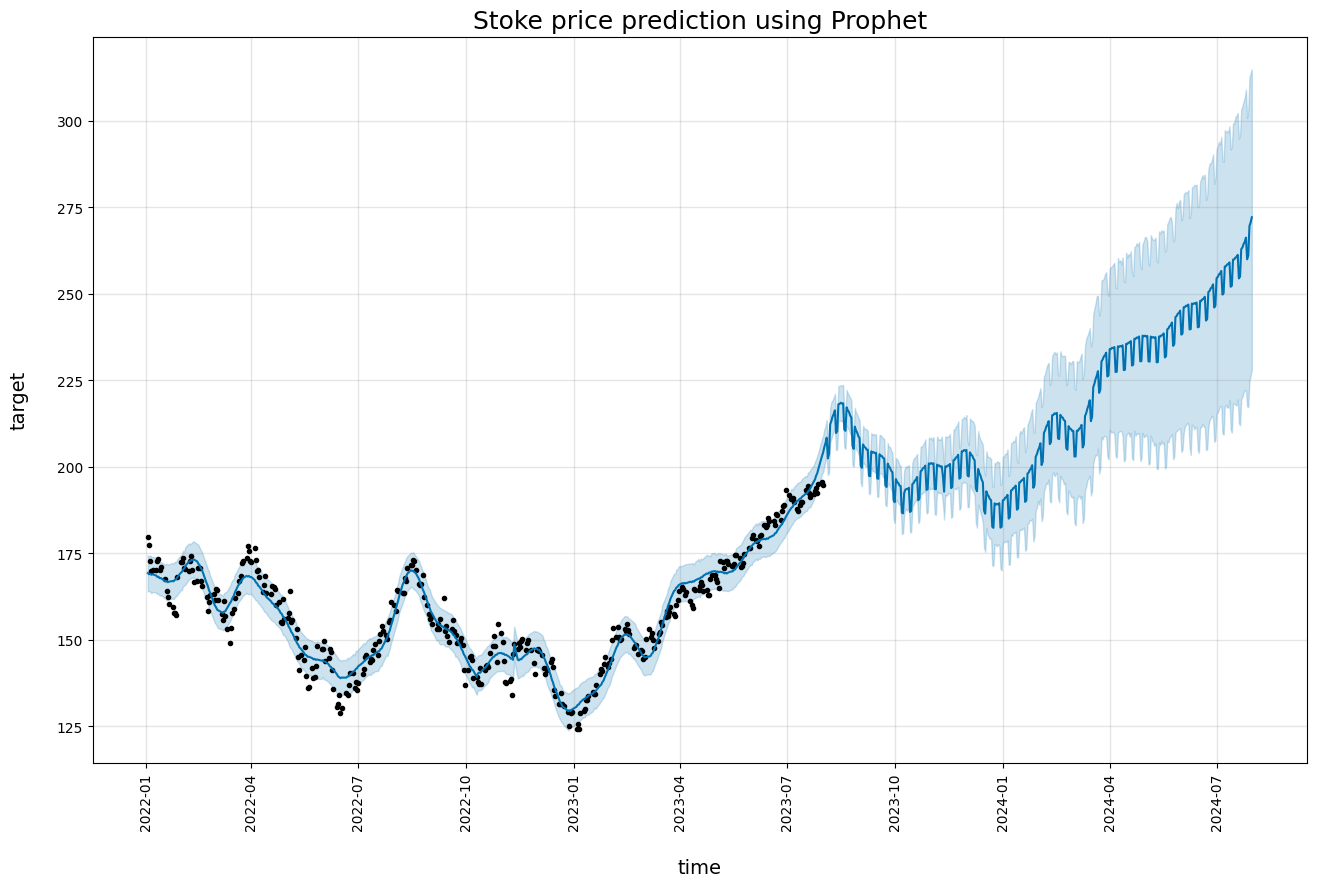

In [7]:
def main():

    symbol = "AAPL"
    from_date = "2022-01-01"
    to_date = "2023-08-01"
    FMP_API_KEY='c4e43ee73621962e360986f8851c34be'
    URL = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?from={from_date}&to={to_date}&apikey={FMP_API_KEY}"

    # Fetch data
    data = fetch_data(URL)

    # Preprocess data
    df = preprocess_data(data)

    # Train Prophet model
    model = train_prophet_model(df)

    # Generate forecast
    forecast = generate_forecast(model, periods=365)  # periods: time in days

    # Plot forecast
    plot_forecast(model, forecast)


if __name__ == "__main__":
    main()